### **PyTorch Computer Vision**

Libraries
- `torchvision` : Base domain for PyTorch Computer Vision

- `torchvision.datasets` : Get datasets and data loading function for computer vision

- `torchvision.models` : Get pretrained computer vision models

- `torchvision.transforms` : Function for manipulating your data to be suitable for computer vision models

- `torch.utils.data.Dataset` : Base dataset class for PyTorch

- `torch.utils.data.DataLoader` : Creates a Python iterable over a dataset

In [4]:
# Import Dependencies
import torch
from torch import nn

import torchvision
from torchvision import datasets 
from torchvision import transforms
from torchvision.transforms import ToTensor 

import matplotlib.pyplot as plt

print(f'Torch Version: {torch.__version__}\nTorchVision Version: {torchvision.__version__}')

Torch Version: 2.4.1
TorchVision Version: 0.19.1


### **1. Getting a Dataset**

The dataset is Fashion MNIST - Grayscale images of clothing

Imagenet dataset

In [5]:
# Setup training data

train_data = datasets.FashionMNIST(
    root='Datasets', # Where to download
    train=True, # Train or Test data
    download=True,
    transform=torchvision.transforms.ToTensor(), # Converts to `data` tensor
    target_transform=None # To transform the `target` or `label`
)

test_data = datasets.FashionMNIST(root='Datasets',
                                  train=False,
                                  download=True,
                                  transform=ToTensor(),
                                  target_transform=None)

# ToTensor() converts Python Image Library (PIL) or numpy.ndarray to tensor
# H*W*C -> C*H*W, Range of [0.0, 1.0]

In [6]:
len(train_data), len(test_data)

(60000, 10000)

In [7]:
class_names = train_data.classes
class_names # 9 Labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
# See first training example
image, label = train_data[0] # 9th Label
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [9]:
class_to_idx = train_data.class_to_idx
class_to_idx # Class to IDX mapping

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [10]:
train_data.targets, train_data.targets.shape # All Labels

(tensor([9, 0, 0,  ..., 3, 0, 5]), torch.Size([60000]))

In [11]:
# Check shape of image
image.shape # [Color Channel, Height, Weight]

# Color Channel - GreyScale 1 or 0

torch.Size([1, 28, 28])

In [12]:
class_name_0 = class_names[label]
class_name_0

'Ankle boot'

(-0.5, 27.5, 27.5, -0.5)

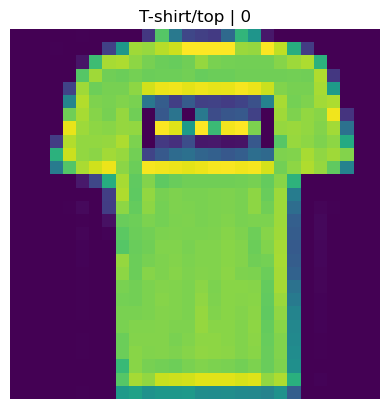

In [13]:
# Visualize random sample of data
image, label = train_data[1]

plt.imshow(image.squeeze()) 
# Remove an extra dimension since `matplotlib` doesn't support [1,28,28] shape

plt.title(f'{class_names[label]} | { label}')
plt.axis(False)

Text(0.5, 1.0, 'Dress | 3')

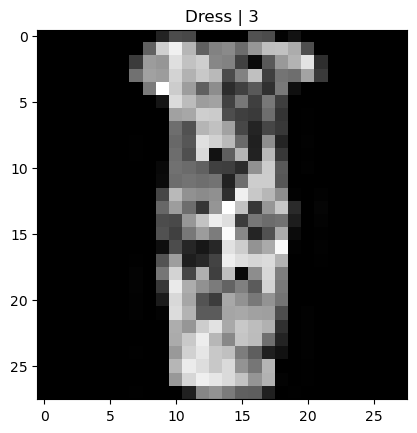

In [14]:
# In Greyscale
image, label = test_data[100]
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f'{class_names[label]} | {label}')

# Pixelated since the images are 28px by 28px

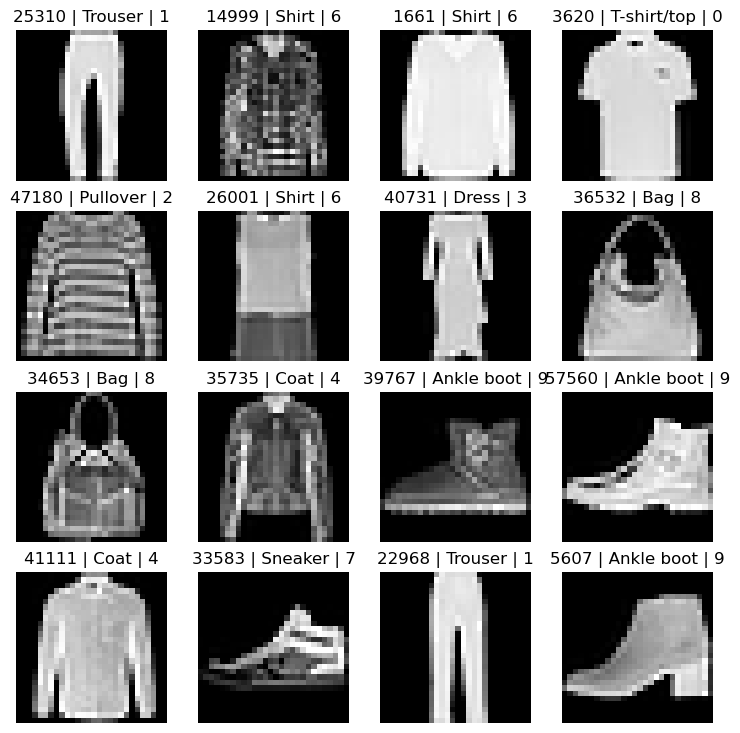

In [15]:
# Plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4

for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    # size[1] means generate 1D tensor with 1 value, Ex: tensor([185])
    # item() extracts 185 only

    image, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)

    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f'{random_idx} | {class_names[label]} | {label}')
    plt.axis(False)

### **2. Prepare Dataloader**

Currently, data is in form of **PyTorch Datasets**

Dataloader turns our datasets into a **Python Iterable**

- Turn data into batches or mini-batches

    - It is more computationally efficient, break data into 32 images at a time instead of 60k images at once

    - Gives our neural network more chances to update its gradients per epoch

    - Check Mini Batch Gradient Descent

In [16]:
from torch.utils.data import DataLoader

# Setup the batch size
BATCH_SIZE = 32

# Turn datasets into iterables (Batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True)
# Shuffle is set to True so that the model doesn't learn order of images during training
# Shuffling isn't necessary during testing

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=False)

train_dataloader, test_dataloader # Instances

(<torch.utils.data.dataloader.DataLoader at 0x1c28ee6a4b0>,
 <torch.utils.data.dataloader.DataLoader at 0x1c28f1ab470>)

In [17]:
# Checking out
print(f'Dataloaders: {train_dataloader, test_dataloader}')
print(f'Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}')
print(f'Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}')

# Last batch might not have 32 images

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x000001C28EE6A4B0>, <torch.utils.data.dataloader.DataLoader object at 0x000001C28F1AB470>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [18]:
# Accessing a single batch and label
train_iter = iter(train_dataloader) 
# Use this and next(train_iter) to get consecutive batches each run

train_features_batch1, train_labels_batch1 = next(iter(train_dataloader))
train_features_batch2, train_labels_batch2 = next(iter(train_dataloader))

print(len(train_features_batch1), len(train_features_batch2))
print(len(train_labels_batch1), len(train_labels_batch2))

train_features_batch1 == train_features_batch2

32 32
32 32


tensor([[[[True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          ...,
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True]]],


        [[[True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          ...,
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True]]],


        [[[True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          ...,
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True, 

Image Shape: torch.Size([1, 28, 28])
Label: 6, Label Shape: torch.Size([])


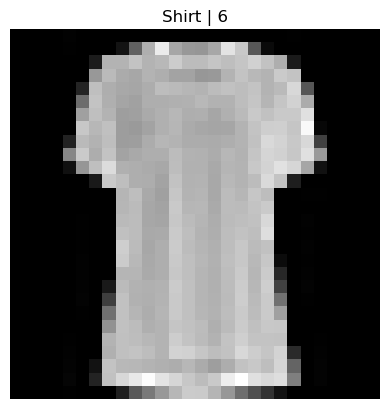

In [19]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch1), size=[1]).item()

image, label = train_features_batch1[random_idx], train_labels_batch1[random_idx]
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f'{class_names[label]} | {label}')
plt.axis('off')

print(f'Image Shape: {image.shape}')
print(f'Label: {label}, Label Shape: {label.shape}')

### 3. **ModelV0**: Build a baseline model

- Baseline Model is a simple model that is improved with subsequent models/experiments

In [20]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch1[15]

# Flatten Sample
xflat = flatten_model(x)

print(f'Shape of x before flattening: {x.shape}') # [color channel, ht, wt]
print(f'Shape of x after flattening: {xflat.shape}') # [color channel, ht*wt]

# 1 Value per pixel, Flattening done so linear transformations can be applied on batches

Shape of x before flattening: torch.Size([1, 28, 28])
Shape of x after flattening: torch.Size([1, 784])


In [21]:
xflat

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.3020, 0.6667, 0.5882, 0.0000, 0.0000, 0.0000, 0.0000, 0.5294, 0.6588,
         0.2706, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0118, 0.0000, 0.0353,
         0.9137, 0.8118, 0.7765, 0.7843, 0.9176, 0.7333, 0.6863, 0.8431, 0.8784,
         0.7804, 0.8118, 0.9216, 0.0471, 0.0000, 0.0157, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.6627, 0.8118, 0.7176, 0.7490, 0.7216, 0.7137, 0.7804, 0.7961, 0.7490,
         0.7333, 0.7451, 0.7255, 0.8078, 0.6824, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000,
         0.0157, 0.7922, 0.7569, 0.7608, 0.7686, 0.7490, 0.7333, 0.7176, 0.7176,
         0.7373, 0.7412, 0.7686, 0.7647, 0.7608, 0.7843, 0.0353, 0.0000, 0.0118,
         0.0000, 0.0000, 0.0

In [22]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # Compress image into a singular vector
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units, 
                      out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [23]:
torch.manual_seed(42)
ModelV0 = FashionMNISTModelV0(input_shape=784, # Height*Width:28*28
                              hidden_units=10,
                              output_shape=len(class_names)
                              ).to('cpu')


dummy_x = torch.rand([1,1,28,28])
ModelV0.eval()
with torch.inference_mode():
    dummy_pred = ModelV0(dummy_x)
dummy_pred # 10 logits for 10 image classes, exactly the required output shape [1, 10]
# Hence, we can't have output shape like [1, 1, 28, 10]


tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]])

In [24]:
dummy_pred.shape

torch.Size([1, 10])

In [25]:
ModelV0.state_dict() # 2 layers of weight and bias

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [26]:
# Loss function and Optimizer - Cross Entropy and SGD, and evaluation metric is accuracy
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
    print('Already exists!')
else:
    print('Downloading!')
    request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
    with open('helper_functions.py') as f:
        f.write(request.content)

Already exists!


In [27]:
from helper_functions import accuracy_fn

loss_fnV0 = nn.CrossEntropyLoss()

optimizerV0 = torch.optim.SGD(params=ModelV0.parameters(),
                              lr=0.1)

In [28]:
# Create a function to time experiments
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    total_time = end - start
    print(f'Train time on {device} is {total_time:.4f} seconds')
    return total_time

In [29]:
I = []
start_time = timer()
for _ in range(10000000):
    I.append(1000)
end_time = timer()

print_train_time(start=start_time,
                 end=end_time)

Train time on None is 1.0058 seconds


1.0057527000008122

In [30]:
print('-'*50)

--------------------------------------------------


In [31]:
str(next(ModelV0.parameters()).device)

'cpu'

In [32]:
''' Create a training loop and training on batches of data
Gradients update once per batch rather than once per epoch
Training and test loss calculated per batch '''

from tqdm.auto import tqdm # Progress Bar

# Set manual seed and start the timer
torch.manual_seed(42)
train_time_oncpu_start = timer()

# Set the no. of epochs
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)): # Wrap epoch range with tqdm
    print(f'Epoch: {epoch}\n{'-'*50}')

    # Training Phase - Loop through the training batches
    train_loss = 0 # Initialize train loss to sum up later
    train_acc = 0

    for batch, (X, y) in enumerate(train_dataloader): # Batch enumerates batch number
        # Batch 1, 2, 3, ... and (X, y) -> (image, label)

        ModelV0.train()

        # 1. Forward Pass
        y_pred = ModelV0(X)

        # 2. Calculate loss per batch
        loss = loss_fnV0(y_pred, y)
        acc = accuracy_fn(y, y_pred.argmax(dim=1))
        train_loss += loss # Accumulate batch loss per epoch to average it out later
        train_acc += acc

        # 3. Optimizer zero grad
        optimizerV0.zero_grad()

        # 4. Backpropagation
        loss.backward()

        # 5. Optimizer Step
        optimizerV0.step()

        # Print out what is happening
        if batch % 320 == 0:
            print(f'Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples')

    # Divide the train loss by length of train dataloader
    train_loss /= len(train_dataloader) # Overall average train loss
    train_acc /= len(train_dataloader)

    # Testing Phase 
    test_loss, test_acc = 0, 0

    ModelV0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # 1. Forward Pass
            test_pred = ModelV0(X_test)

            # 2. Calculate loss accumulatively
            test_loss += loss_fnV0(test_pred, y_test)

            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_test, test_pred.argmax(dim=1)) # To get labels

        # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)

        # Caculate the test accuracy average per batch
        test_acc /= len(test_dataloader)

# Print out status
print(f'\nTrain Loss: {train_loss:.2f} | Train Accuracy: {train_acc:.2f}% | Test Loss: {test_loss:.2f} | Test Accuracy: {test_acc:.2f}%')

train_time_oncpu_end = timer()
total_train_time_ModelV0 = print_train_time(start=train_time_oncpu_start,
                                            end=train_time_oncpu_end,
                                            device=str(next(ModelV0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------------------------------------------------
Looked at 0/60000 samples
Looked at 10240/60000 samples
Looked at 20480/60000 samples
Looked at 30720/60000 samples
Looked at 40960/60000 samples
Looked at 51200/60000 samples
Epoch: 1
--------------------------------------------------
Looked at 0/60000 samples
Looked at 10240/60000 samples
Looked at 20480/60000 samples
Looked at 30720/60000 samples
Looked at 40960/60000 samples
Looked at 51200/60000 samples
Epoch: 2
--------------------------------------------------
Looked at 0/60000 samples
Looked at 10240/60000 samples
Looked at 20480/60000 samples
Looked at 30720/60000 samples
Looked at 40960/60000 samples
Looked at 51200/60000 samples

Train Loss: 0.46 | Train Accuracy: 84.05% | Test Loss: 0.48 | Test Accuracy: 83.43%
Train time on cpu is 16.7201 seconds


In [33]:
### Make predictions and get ModelV0 results
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = None):
    '''
    Returns a dict containing the results of model predicting on data loader
    '''

    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        # Get X, y -> Image, Label from DataLoader
        for X, y in tqdm(data_loader):
            X, y = X.to(device), y.to(device)
            y_pred = model(X)

            # Accumulate loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y, y_pred.argmax(dim=1)) # Choose label with highest prob

        # Scale loss and accuracy to find average loss, accuracy per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"Model Name": model.__class__.__name__, # When model is class instance
        "Model Loss": loss.item(), # Gets 1 item 
        "Model Accuracy": f'{acc:.2f}%'}

# Calculate ModelV0 results on test dataset
ModelV0_results = eval_model(model=ModelV0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fnV0,
                             accuracy_fn=accuracy_fn,
                             device = 'cpu')
ModelV0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model Name': 'FashionMNISTModelV0',
 'Model Loss': 0.47663894295692444,
 'Model Accuracy': '83.43%'}

In [34]:
# Setup device agnostic code -> Shift to GPU
!nvidia-smi

Sun May 11 14:41:53 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 576.28                 Driver Version: 576.28         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   44C    P8              2W /  114W |    1283MiB /   8188MiB |      5%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [35]:
torch.cuda.is_available()

True

In [36]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [37]:
# Adding Non Linearity and running on GPU -> ModelV1
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape),
            nn.ReLU()
        )
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [38]:
# Create instance 
torch.manual_seed(42)
ModelV1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

next(ModelV1.parameters()).device
# Is a generator object, so next(). Also, checks where model parameters are situated: CPU or GPU

device(type='cuda', index=0)

In [39]:
# Loss function and Optimizer
from helper_functions import accuracy_fn
loss_fnV1 = nn.CrossEntropyLoss()

optimizerV1 = torch.optim.SGD(params=ModelV1.parameters(),
                              lr=0.1)

In [40]:
# Training Loop - Functionizing

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               optimizer: torch.optim.Optimizer,
               device: torch.device = None):
    
    train_loss, train_acc = 0, 0

    model.train()

    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)

        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss

        acc = accuracy_fn(y, y_pred.argmax(dim=1))
        train_acc += acc

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)

    print(f'Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.2f}%')


In [41]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = None):
    
    test_loss, test_acc = 0, 0

    model.eval()
    
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)

            y_pred = model(X)

            test_loss += loss_fn(y_pred, y)

            test_acc += accuracy_fn(y, y_pred.argmax(dim=1))

        test_loss /= len(data_loader)      
        test_acc /= len(data_loader)      

    print(f'Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%')

In [42]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_ongpu_start = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n--------------------')

    train_step(model=ModelV1,
              data_loader=train_dataloader,
              loss_fn=loss_fnV1,
              optimizer=optimizerV1,
              accuracy_fn=accuracy_fn,
              device=device)
    
    test_step(model=ModelV1,
              data_loader=test_dataloader,
              loss_fn=loss_fnV1,
              accuracy_fn=accuracy_fn,
              device=device)
    
train_time_ongpu_end = timer()

total_train_time_ModelV1 = print_train_time(start=train_time_ongpu_start, 
                                            end=train_time_ongpu_end, 
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------------------
Train Loss: 1.09199 | Train Accuracy: 61.34%
Test Loss: 0.95636 | Test Accuracy: 65.00%
Epoch: 1
--------------------
Train Loss: 0.78101 | Train Accuracy: 71.93%
Test Loss: 0.72227 | Test Accuracy: 73.91%
Epoch: 2
--------------------
Train Loss: 0.67027 | Train Accuracy: 75.94%
Test Loss: 0.68500 | Test Accuracy: 75.02%
Train time on cuda is 26.2447 seconds


In [43]:
ModelV0_results

{'Model Name': 'FashionMNISTModelV0',
 'Model Loss': 0.47663894295692444,
 'Model Accuracy': '83.43%'}

In [44]:
total_train_time_ModelV0

16.720084000000497

In [45]:
ModelV1_results = eval_model(model=ModelV1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fnV1,
                             accuracy_fn=accuracy_fn,
                             device=device)
ModelV1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model Name': 'FashionMNISTModelV1',
 'Model Loss': 0.6850008964538574,
 'Model Accuracy': '75.02%'}

In [46]:
total_train_time_ModelV1

26.244745499998317

### **Note**: Training on CPU faster than training on GPU

1. Overhead of copying data/model to and from the GPU outweighs the compute benefits offered by GPU

### **Convolutional Neural Networks (CNNs)**

In [55]:
# Model 2: CNN -> ConvNets: Finds patterns in visual data
# Simple CNN: 
# Inputs -> 
#   Processed Input (RGB Tensors) -> 
#       Conv Layer -> 
#           ReLU Layer -> 
#               Pooling Layer -> 
#                   Linear Output Layer (Labels)

# Residual Connections: Non-consecutive layers communicate with each other
# CNN Explainer Website

class FashionMNISTModelV2(nn.Module):
    '''
    Model architecture that replicates the TinyVGG model from CNN explainer website
    '''
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__() # Block -> Layers, Model -> Blocks
        self.conv_block_one = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, # 2D because we are working with images (ht*wd)
                      out_channels=hidden_units,
                      kernel_size=3, # Can also be set as a tuple (3,3)
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
            # MaxPool takes maximum value from numbers presents in the filter/windows
        )

        self.conv_block_two = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        # Output Layer also called Classifier
        self.classifier = nn.Sequential(
            nn.Flatten(), # Tensor per Pixel Transformation
            nn.Linear(in_features=hidden_units*0, # Not sure right now!
                      out_features=output_shape)
        )

    def forward(self, x):
        print(f'Before Conv: {x.shape}')
        x = self.conv_block_one(x)
        print(f'After passing through first Conv: {x.shape}')
        x = self.conv_block_two(x)
        print(f'After passing through second Conv: {x.shape}')
        x = self.classifier(x)
        print(f'After Classifier: {x.shape}')

        return x

In [53]:
image.shape

torch.Size([1, 28, 28])

In [58]:
torch.manual_seed(42)
ModelV2 = FashionMNISTModelV2(input_shape=1, # 1 Color Channel
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [59]:
# Stepping through `nn.Conv2d()`
torch.manual_seed(42)